<a href="https://colab.research.google.com/github/lin3372/BK_Graph_Machine_Learning_Pkt21/blob/main/01_04_Graphs_Benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmark and Repositories

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

## Pre-requisite

1.  lib import
2.  color definition
3.  directory handling

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [3]:
import os
output_dir = "./figures"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)
!ls 

figures  sample_data


## Graph Drawing FNs

In [65]:
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None, edge_color='gray'):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color=edge_color)
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

## **Clique** -- Simple Example of Graphs

A clique, ***C***, in an undirected graph is defined a subset of its vertices, ***C*** ∈  ***V***, such that every two distinct vertices in the subset are adjacent. This is equivalent to the condition that **the induced subgraph of *G* induced by *C* is a fully connected graph**

1.   Complete Graph
2.   Lollipop Graph
3.   Barbell Graph



We start with some simple graphs
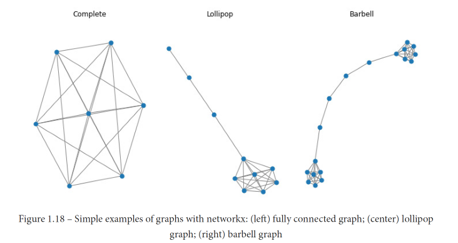

In [66]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=4, n=5)
barbell = nx.barbell_graph(m1=4, m2=5)

A ***lollipop*** graph formed by a clique of size ***n*** and a branch of ***m*** nodes

A ***barbell*** graph formed by two cliques of size ***m1*** and ***m2*** joined by a branch of nodes

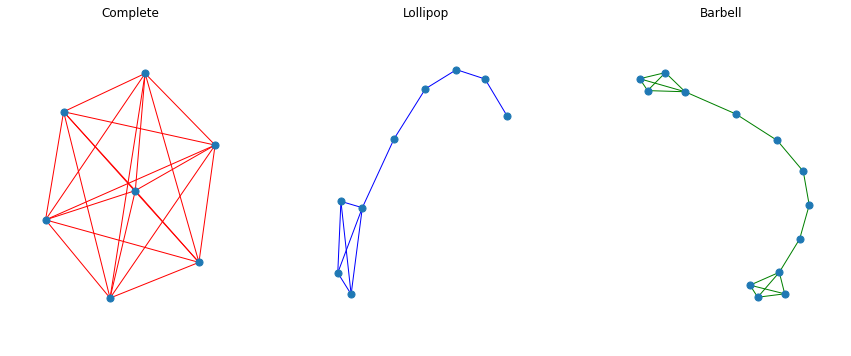

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete, edge_color='red')
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop, edge_color='blue')
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell, edge_color='green')
plt.savefig(os.path.join(output_dir, "SimpleGraphs.png"))

In [71]:
complete = nx.relabel_nodes(nx.complete_graph(n=7), lambda x: x + 0)
lollipop = nx.relabel_nodes(nx.lollipop_graph(m=4, n=5), lambda x: x+100)
barbell = nx.relabel_nodes(nx.barbell_graph(m1=4, m2=5), lambda x: x+200)
nx.relabel_nodes

<function networkx.relabel.relabel_nodes>

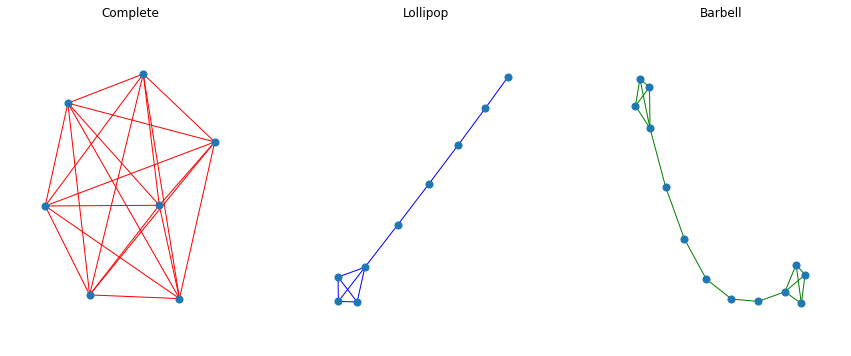

In [73]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete,edge_color='red')
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop, edge_color='blue')
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell, edge_color='green')
plt.savefig(os.path.join(output_dir, "SimpleGraphs-relabelling.png"))

In [74]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

## **Graph Composing** into ONE Graph
Merging subgraphs is very easy with networkx and can be done with just a few lines of code, as shown in the following code snippet, where the three graphs are merged together into a single graph and some random edges are placed to connect them

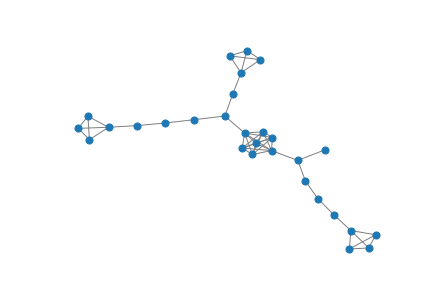

In [95]:
import numpy as np

allGraphs = nx.compose_all([complete, barbell, lollipop])

#allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(lollipop), get_random_node(complete))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

#draw_graph(allGraphs, layout=nx.kamada_kawai_layout)
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)

## **Generative Graph models**
Networks may also be generated by means of **probabilistic models** and/or **generative models** that let a graph grow by itself. Such graphs usually share interesting properties with real networks and have long been used to create benchmarks and synthetic graphs, especially in times when the amount of data available was not as overwhelming as today.

### Watts and Strogatz (1998)
This model was used to study the behavior of small-world networks— that is to say, networks that resemble, to some extent, common social networks. 
The graph is generated by first displacing ***n*** nodes in a ring and connecting each node with its ***k*** neighbors. Each edge of such a graph then has a probability p of being rewired to a randomly chosen node. 

By ranging ***p***, the Watts and Strogatz model allows a shift from a regular network (***p***=0) to a completely random network (***p***=1). 

In between, graphs exhibit small-world features; that is, they tend to bring this model closer to social network graphs.


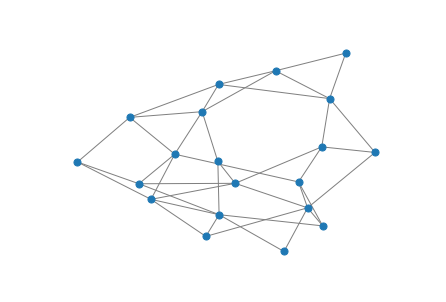

In [98]:
graph = nx.watts_strogatz_graph(n=20, k=5, p=0.2)
draw_graph(graph)

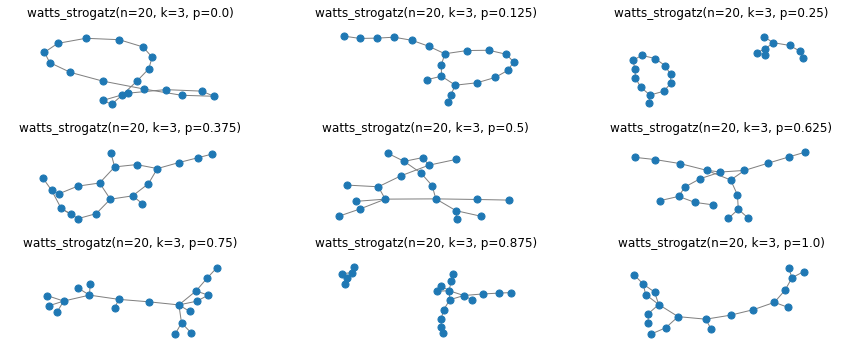

In [124]:
import math
nNodes= 20
K = 3
nGfx = 9

plt.figure(figsize=(15,6))
nFigEachRows=int(math.sqrt(nGfx))   # num of rows for each display row
nFigRows = int((nGfx + (nFigEachRows-1)) / nFigEachRows)  # num of rows needed for displaying all figures


for iGfx in range(0, nGfx):
  prob=round(iGfx * 1.0/(nGfx-1),3)
  WSG = nx.watts_strogatz_graph(n=nNodes, k=K, p=prob)
  plt.subplot(nFigRows,nFigEachRows,iGfx+1)
  draw_graph(WSG)
  plt.title(f"watts_strogatz(n={nNodes}, k={K}, p={prob:3})")

plt.savefig(os.path.join(output_dir, f"watts_strogatz_graph(n={nNodes},K={K}).png"))

#### Model Barabasi Albert

In the following we create and analyse some simple graph generated by the Barabasi-Albert model 

In [13]:
BA_graph_small = nx.extended_barabasi_albert_graph(n=20,m=1,p=0,q=0)

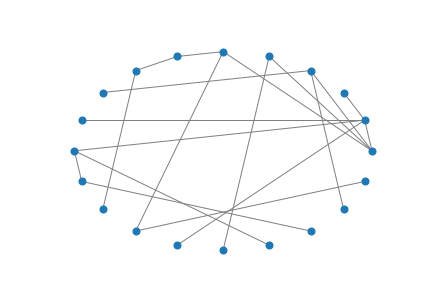

In [14]:
draw_graph(BA_graph_small, layout=nx.circular_layout)

We analyse large Barabasi-Albert graphs to investigate their ability to generate power-law distribution for the degree of node

In [15]:
n = 1E5
bag = nx.extended_barabasi_albert_graph(n,m=1,p=0,q=0)

In [16]:
degree = dict(nx.degree(bag)).values()

In [17]:
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 10))

In [18]:
from collections import Counter
cnt = Counter(np.digitize(np.array(list(degree)), bins))

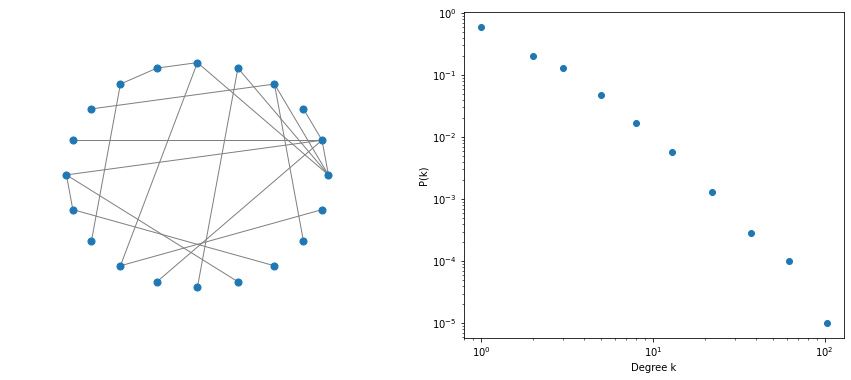

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
draw_graph(BA_graph_small, layout=nx.circular_layout)
plt.subplot(1,2,2)
x, y = list(zip(*[(bins[k-1], v/n) for k, v in cnt.items()]))
plt.plot(x, y, 'o'); plt.xscale("log"); plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.savefig(os.path.join(output_dir, "Barabasi_Albert.png"))

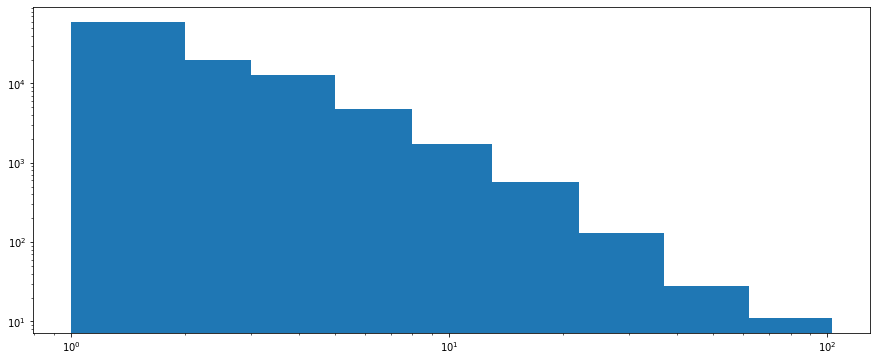

In [20]:
plt.figure(figsize=(15, 6))

plt.hist(degree, bins=bins)
plt.xscale("log")
plt.yscale("log")

Other simple graph Benchmarks

In [21]:
import pandas as pd

In [22]:
graph = nx.florentine_families_graph()

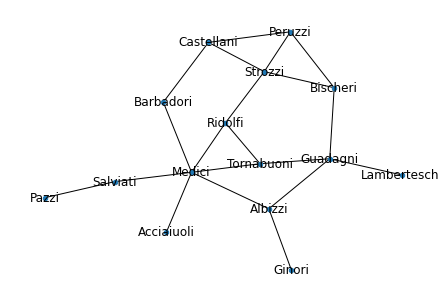

In [23]:
nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=12)
plt.savefig("Florentine.png")

### Benchmarks from the Network Data Repository

This dataset (and other) can be downloaded from http://networkrepository.com/. The datasets are generally in the MTX file format that has been described in the book. 

In particular the dataset here presented is taken from the collaboration network of Arxiv Astro Physics, that can be downloaded from http://networkrepository.com/ca-AstroPh.php.

As better explained in the book, some of the files that can be downloaded from that source are somewhat non-standard and needs small fixes. Please make sure the header of the file has the following 

*%%MatrixMarket matrix coordinate pattern symmetric*

with a double %

In [24]:
from scipy.io import mmread

In [25]:
file = "ca-AstroPh.mtx"
adj_matrix = mmread(file)

FileNotFoundError: ignored

In [ ]:
graph = nx.from_scipy_sparse_matrix(adj_matrix)

In [ ]:
degrees = dict(nx.degree(graph))

In [ ]:
ci = nx.clustering(graph)

In [ ]:
centrality = nx.centrality.eigenvector_centrality(graph)

In [ ]:
stats = pd.DataFrame({
    "centrality": centrality, 
    "C_i": ci, 
    "degree": degrees
})

In [ ]:
stats.head()

Here we provide some simple analysis of the DataFrame we generated to see correlations between centrality, clustering coefficient and degree. 

In [ ]:
plt.plot(stats["centrality"], stats["degree"], 'o')
plt.xscale("log")
plt.yscale("log")

In [ ]:
plt.plot(stats["centrality"], stats["C_i"], 'o')
plt.xscale("log")
plt.yscale("log")

### Ego-network 

Here we plot the ego-network of the most-connected node, that has id 6933. However, even this network looks a bit messy since it has hundreds of nodes. We therefore sample randomly or based on centrality/clustering coefficient in order to plot a relevant subgraph.

In [ ]:
neighbors = [n for n in nx.neighbors(graph, 6933)]

In [ ]:
sampling = 0.1

In [ ]:
nTop = round(len(neighbors)*sampling)

In [ ]:
idx = {
    "random": stats.loc[neighbors].sort_index().index[:nTop], 
    "centrality": stats.loc[neighbors].sort_values("centrality", ascending=False).index[:nTop],
    "C_i": stats.loc[neighbors].sort_values("C_i", ascending=False).index[:nTop]
}

In [ ]:
def plotSubgraph(graph, indices, center = 6933):
    draw_graph(
        nx.subgraph(graph, list(indices) + [center]),
        layout = nx.kamada_kawai_layout
    )

In [ ]:
plt.figure(figsize=(15,6))
for ith, title in enumerate(["random", "centrality", "C_i"]):
    plt.subplot(1,3,ith+1)
    plotSubgraph(graph, idx[title])
    plt.title(title)
plt.savefig(os.path.join(output_dir, "PhAstro"))

### Data to Gephi

Otherwise, we could also export the data from networkx in order to plot it and analyse it using the Gephi software.

In [ ]:
nx.write_gexf(graph, 'ca-AstroPh.gexf')

### Bipartite Graphs

In [ ]:
n=10

n_nodes = 10
n_edges = 12

bottom_nodes = [ith for ith in range(n) if int(ith) % 2 == 0]
top_nodes = [ith for ith in range(n) if int(ith) % 2 == 1.0]

In [ ]:
iter_edges = zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges))

edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])

In [ ]:


B = nx.Graph()

B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)


In [ ]:
B.add_edges_from([tuple(x) for x in edges.values])

In [ ]:
from networkx.drawing.layout import bipartite_layout

In [ ]:
pos = bipartite_layout(B, bottom_nodes)

nx.draw_networkx(B, pos=pos)